In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [7]:
from causalml.dataset import make_uplift_classification_logistic
from causalml.dataset import make_uplift_classification

In [30]:
from sklearn.linear_model import LogisticRegression

In [61]:
from pygam import LogisticGAM, s

# Copy code from tests/ to create data

In [120]:
RANDOM_SEED = 42
N_SAMPLE = 1000
ERROR_THRESHOLD = 0.5
NUM_FEATURES = 6

TREATMENT_COL = "treatment"
SCORE_COL = "score"
GROUP_COL = "group"
OUTCOME_COL = "outcome"

CONTROL_NAME = "control"
TREATMENT_NAMES = [CONTROL_NAME, "treatment1", "treatment2", "treatment3"]
CONVERSION = "conversion"
DELTA_UPLIFT_INCREASE_DICT = {
    "treatment1": 0.25,
}
N_UPLIFT_INCREASE_DICT = {"treatment1": 2}


In [121]:
np.random.seed(RANDOM_SEED)

In [122]:
df, x_names = make_uplift_classification(
    n_samples=N_SAMPLE,
    treatment_name=TREATMENT_NAMES,
    y_name=CONVERSION,
    random_seed=RANDOM_SEED,
)


In [123]:
df


,treatment_group_key,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_irrelevant,x7_irrelevant,x8_irrelevant,x9_irrelevant,...,x12_uplift_increase,x13_increase_mix,x14_uplift_increase,x15_uplift_increase,x16_increase_mix,x17_uplift_increase,x18_uplift_increase,x19_increase_mix,conversion,treatment_effect
0,control,0.657479,-0.443360,-2.402375,2.195439,-0.918792,0.953660,1.380484,-0.414387,-0.314830,...,-0.589027,0.485289,1.380695,0.862746,-0.139670,-3.339225,-0.670977,-1.060338,1,0
1,treatment3,-3.550170,-0.677176,0.496001,2.578495,0.878774,-1.265629,1.507098,0.472798,0.031004,...,-0.270001,0.622789,1.133862,0.932638,-0.185633,1.421218,0.798990,1.143162,1,0
2,control,0.337708,-0.205064,-0.935860,2.387802,1.291499,0.321825,-0.176657,-0.919809,-0.729275,...,-0.466893,0.549570,0.455023,1.345184,-0.132644,-0.629653,1.056432,-0.102886,1,0
3,treatment3,-0.658448,0.709190,-0.904006,0.916896,-1.774884,0.738277,-0.274451,1.544034,-0.094857,...,-1.706929,0.019702,0.808746,1.112279,0.044175,-0.235096,2.678429,-0.666264,0,0
4,treatment2,-1.746624,0.815740,0.526936,-1.045280,-0.214065,0.057787,-2.294394,0.560460,0.342247,...,-0.814635,-0.368205,0.709317,1.075760,0.065456,0.915348,1.409424,-0.264037,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,treatment1,-0.781229,0.643953,-0.156863,1.799299,1.127438,-0.199674,-1.261297,-0.317617,-0.029676,...,-0.592398,0.383991,0.670806,1.237448,0.023751,-0.780821,1.504774,-0.845323,0,0
3996,treatment1,-0.149589,-0.593811,0.382449,0.227025,-0.156404,1.008681,-1.368592,-0.886641,-0.600990,...,-0.869664,-0.051109,0.714499,1.233508,-0.192675,1.620011,3.217546,1.160765,0,0
3997,control,1.025420,1.322352,0.045153,-0.510702,-0.147870,-0.179250,0.800310,-0.831470,-1.018497,...,-0.956098,-0.249793,0.511915,-0.857066,0.293157,0.352540,1.483086,-0.907262,1,0
3998,treatment3,0.624495,1.519888,0.505061,3.550311,-0.196157,-2.047163,0.132495,0.200972,0.804704,...,-1.093604,0.767107,1.180481,0.846085,0.205257,0.717389,1.219995,-0.910540,1,0


In [124]:
x_names

['x1_informative',
 'x2_informative',
 'x3_informative',
 'x4_informative',
 'x5_informative',
 'x6_irrelevant',
 'x7_irrelevant',
 'x8_irrelevant',
 'x9_irrelevant',
 'x10_irrelevant',
 'x11_uplift_increase',
 'x12_uplift_increase',
 'x13_increase_mix',
 'x14_uplift_increase',
 'x15_uplift_increase',
 'x16_increase_mix',
 'x17_uplift_increase',
 'x18_uplift_increase',
 'x19_increase_mix']

In [125]:
df["treatment_group_key"] = np.where(
    df["treatment_group_key"] == CONTROL_NAME, 0, 1
)

In [126]:
df

,treatment_group_key,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_irrelevant,x7_irrelevant,x8_irrelevant,x9_irrelevant,...,x12_uplift_increase,x13_increase_mix,x14_uplift_increase,x15_uplift_increase,x16_increase_mix,x17_uplift_increase,x18_uplift_increase,x19_increase_mix,conversion,treatment_effect
0,0,0.657479,-0.443360,-2.402375,2.195439,-0.918792,0.953660,1.380484,-0.414387,-0.314830,...,-0.589027,0.485289,1.380695,0.862746,-0.139670,-3.339225,-0.670977,-1.060338,1,0
1,1,-3.550170,-0.677176,0.496001,2.578495,0.878774,-1.265629,1.507098,0.472798,0.031004,...,-0.270001,0.622789,1.133862,0.932638,-0.185633,1.421218,0.798990,1.143162,1,0
2,0,0.337708,-0.205064,-0.935860,2.387802,1.291499,0.321825,-0.176657,-0.919809,-0.729275,...,-0.466893,0.549570,0.455023,1.345184,-0.132644,-0.629653,1.056432,-0.102886,1,0
3,1,-0.658448,0.709190,-0.904006,0.916896,-1.774884,0.738277,-0.274451,1.544034,-0.094857,...,-1.706929,0.019702,0.808746,1.112279,0.044175,-0.235096,2.678429,-0.666264,0,0
4,1,-1.746624,0.815740,0.526936,-1.045280,-0.214065,0.057787,-2.294394,0.560460,0.342247,...,-0.814635,-0.368205,0.709317,1.075760,0.065456,0.915348,1.409424,-0.264037,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,-0.781229,0.643953,-0.156863,1.799299,1.127438,-0.199674,-1.261297,-0.317617,-0.029676,...,-0.592398,0.383991,0.670806,1.237448,0.023751,-0.780821,1.504774,-0.845323,0,0
3996,1,-0.149589,-0.593811,0.382449,0.227025,-0.156404,1.008681,-1.368592,-0.886641,-0.600990,...,-0.869664,-0.051109,0.714499,1.233508,-0.192675,1.620011,3.217546,1.160765,0,0
3997,0,1.025420,1.322352,0.045153,-0.510702,-0.147870,-0.179250,0.800310,-0.831470,-1.018497,...,-0.956098,-0.249793,0.511915,-0.857066,0.293157,0.352540,1.483086,-0.907262,1,0
3998,1,0.624495,1.519888,0.505061,3.550311,-0.196157,-2.047163,0.132495,0.200972,0.804704,...,-1.093604,0.767107,1.180481,0.846085,0.205257,0.717389,1.219995,-0.910540,1,0


#  Fit a LogisticRegression model to calculate propensity scores

In [127]:
propensity_model = LogisticRegression()

In [128]:
propensity_model.fit(X=df[x_names].values, y=df["treatment_group_key"].values)

LogisticRegression()

In [129]:
df["propensity_score"] = propensity_model.predict_proba(df[x_names].values)[:, 1]

<Axes: >

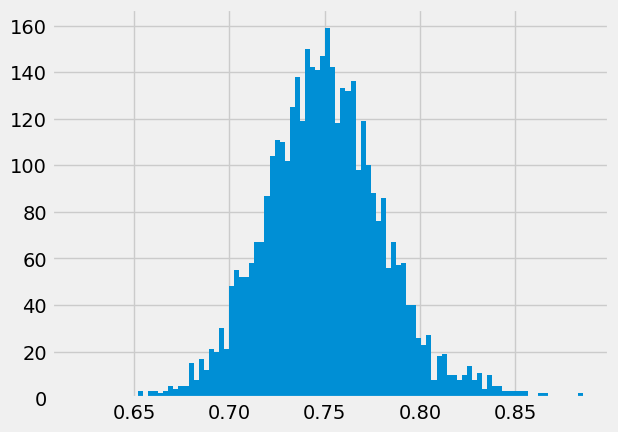

In [130]:
df["propensity_score"].hist(bins=100)

# Calculate the uncalibrated propensity scores

In [131]:
from causalml.propensity import compute_propensity_score

In [132]:
ps_uc, psm = compute_propensity_score(df[x_names].values, df["treatment_group_key"].values, calibrate_p=False)

array([[<Axes: title={'center': '0'}>]], dtype=object)

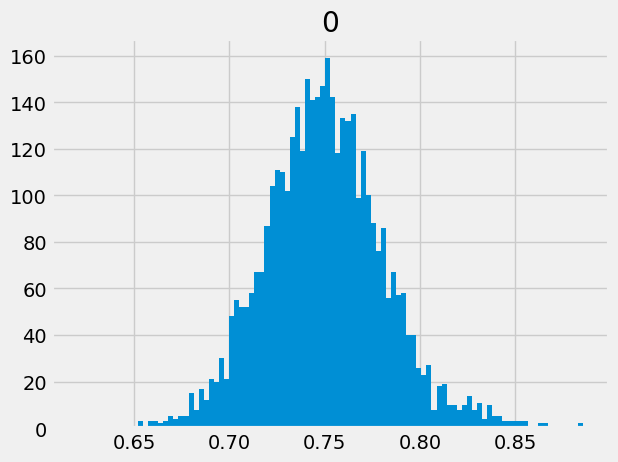

In [133]:
pd.DataFrame(ps_uc).hist(bins=100)

## Uncalibrated propensity score histogram (ElasticNet) is similar to LogisticRegression propensity score 

# Compute the calibrated propensity scores using `compute_propensity_score`

In [134]:
ps_c, psm = compute_propensity_score(df[x_names].values, df["treatment_group_key"].values, calibrate_p=True)

array([[<Axes: title={'center': '0'}>]], dtype=object)

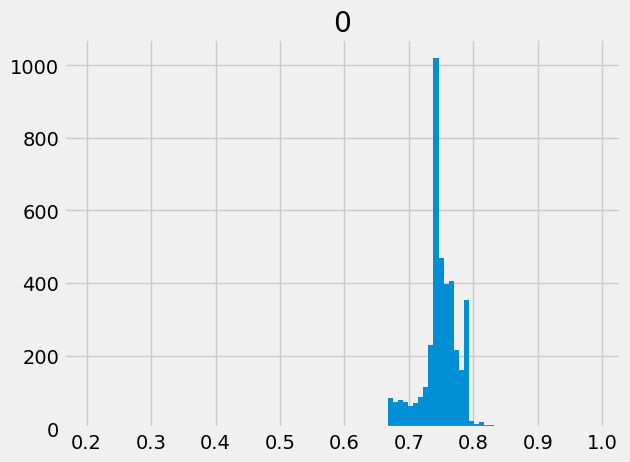

In [135]:
pd.DataFrame(ps_c).hist(bins=100)

## This looks a bit odd

# Reproduce the pygam calibrated propensity scores by copying the function

In [136]:
def calibrate_pg(ps, treatment):
    """Calibrate propensity scores with logistic GAM.

    Ref: https://pygam.readthedocs.io/en/latest/api/logisticgam.html

    Args:
        ps (numpy.array): a propensity score vector
        treatment (numpy.array): a binary treatment vector (0: control, 1: treated)

    Returns:
        (numpy.array): a calibrated propensity score vector
    """

    gam = LogisticGAM(s(0)).fit(ps, treatment)

    return gam.predict_proba(ps)

In [137]:
ps_cal_pg = calibrate_pg(df["propensity_score"].values, df["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

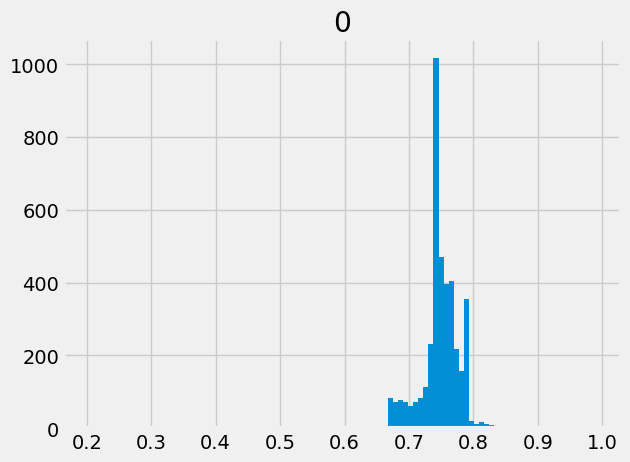

In [138]:
pd.DataFrame(ps_cal_pg).hist(bins=100)

# Modify the pygam calibrated propensity scores by reordering according to the scores

In [139]:
df_sorted = df.sort_values(by='propensity_score')

In [140]:
df_sorted

,treatment_group_key,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_irrelevant,x7_irrelevant,x8_irrelevant,x9_irrelevant,...,x13_increase_mix,x14_uplift_increase,x15_uplift_increase,x16_increase_mix,x17_uplift_increase,x18_uplift_increase,x19_increase_mix,conversion,treatment_effect,propensity_score
1096,0,-1.111190,0.438135,-2.276399,1.611669,-0.473282,1.825521,1.518076,-0.360777,-0.878061,...,0.226215,-0.055074,1.456652,-0.028049,0.593125,-0.714741,-0.098820,0,0,0.620141
1106,1,-0.595526,-1.907796,-0.300147,0.638002,-1.594413,1.628373,1.135865,-0.428003,-1.298290,...,-0.025922,0.373950,1.414675,-0.435759,-3.285261,-1.800924,0.132662,0,0,0.643686
1586,0,-0.310754,-0.139041,-1.073153,-0.595262,1.741216,2.270225,-0.760511,0.654791,0.727549,...,-0.391319,0.594926,1.278240,-0.116271,-2.542332,-0.089924,-0.965912,0,0,0.647613
3375,1,-1.758474,-1.606585,-1.612051,0.542276,-0.120724,2.057218,-0.327886,-1.225014,-1.324874,...,0.193844,1.135435,1.002259,-0.353363,1.417967,0.632849,1.884417,1,0,0.652538
3759,1,-2.100664,-0.553318,-3.308229,-0.426281,-0.924080,-0.217071,1.015645,-0.841771,0.686150,...,-0.223547,1.100102,0.874925,-0.159798,1.679393,-1.133724,1.153565,0,0,0.653915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1,0.670563,-0.419107,0.262552,0.627255,-0.352264,-1.382960,-0.067625,0.330914,-1.124132,...,0.036570,2.263879,-2.402650,0.099413,0.680300,3.241379,0.623079,1,0,0.866611
2880,1,-1.203899,1.040264,-1.175771,0.195311,1.100660,-0.657126,-1.610726,-2.307616,0.418215,...,-0.100561,4.237437,-3.819970,0.456851,0.707560,2.663273,-0.531466,0,0,0.870283
3840,1,1.017662,0.346327,2.890433,1.858775,1.639029,-2.559372,-1.324704,-1.553635,0.082229,...,0.396389,1.427723,-2.205103,0.219219,-1.786017,-0.121745,-1.033341,1,0,0.873050
3228,1,2.476283,-0.777592,0.836712,1.334163,-0.108957,-1.219409,-1.153923,-1.848278,0.500095,...,0.220939,3.562114,-3.312029,0.102049,-3.005511,-0.346037,-0.651902,0,0,0.883031


In [141]:
ps_cal_pg = calibrate_pg(df_sorted["propensity_score"], df_sorted["treatment_group_key"].values)

array([[<Axes: title={'center': '0'}>]], dtype=object)

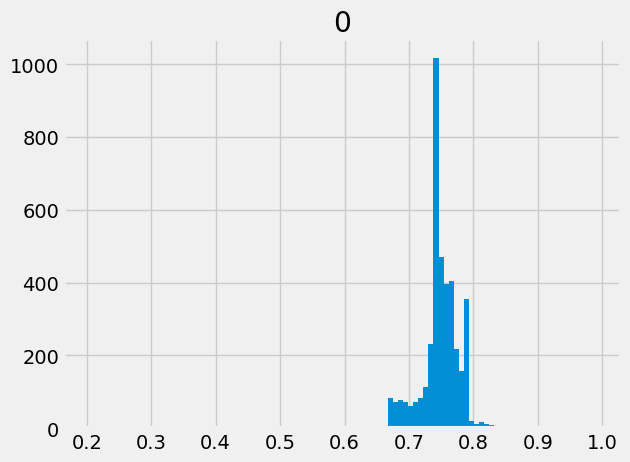

In [142]:
pd.DataFrame(ps_cal_pg).hist(bins=100)

In [143]:
from sklearn.metrics import log_loss

In [144]:
# ps_cal_pg = calibrate_pg(df["propensity_score"].values, df["treatment_group_key"].values)

log_loss(df["treatment_group_key"].values, df["propensity_score"].values)


0.5596360892011015

In [145]:
# ps_cal_pg = calibrate_pg(df["propensity_score"].values, df["treatment_group_key"].values)
log_loss(df["treatment_group_key"].values, ps_cal_pg)


0.563755518096316

In [146]:
# ps_cal_pg = calibrate_pg(df["propensity_score"].values, df["treatment_group_key"].values)
log_loss(df["treatment_group_key"].values, ps_cal_lr)


0.5605615588151731

# Modify the Calibration function to use LogisticRegression

In [147]:
def calibrate_lr(ps, treatment):
    """Calibrate propensity scores with LogisticRegression.

    Args:
        ps (numpy.array): a propensity score vector
        treatment (numpy.array): a binary treatment vector (0: control, 1: treated)

    Returns:
        (numpy.array): a calibrated propensity score vector
    """

    lrm = LogisticRegression().fit(ps, treatment)

    return lrm.predict_proba(ps)

In [148]:
pd.DataFrame(ps_uc).describe()

,0
count,4000.000000
mean,0.750000
std,0.031513
min,0.620157
25%,0.729260
50%,0.749345
75%,0.769362
max,0.885611


In [88]:
pd.DataFrame(ps_uc).values

array([[0.71886852],
       [0.74028945],
       [0.7368792 ],
       ...,
       [0.80023257],
       [0.80116623],
       [0.76505939]])

In [102]:
ps_cal_lr = calibrate_lr(ps_uc.reshape(-1,1), df["treatment_group_key"].values)[:, 1]

In [104]:
ps_cal_lr

array([0.73672997, 0.74607674, 0.74460347, ..., 0.77104657, 0.7714215 ,
       0.75660839])

array([[<Axes: title={'center': '0'}>]], dtype=object)

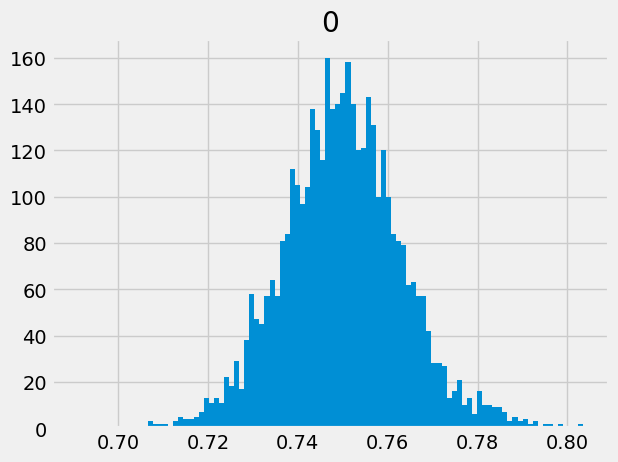

In [105]:
pd.DataFrame(ps_cal_lr).hist(bins=100)

# Scratch